In [19]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

#from label_flip_revised.utils import create_dir

In [20]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/diva_01


In [21]:
path_output = os.path.join(PATH_ROOT, 'results_plot')
print(path_output)
#create_dir(path_output)

/home/lukec/workspace/diva_01/results_plot


In [22]:
df_falfa_01 = pd.read_csv(os.path.join(PATH_ROOT, 'results', 'real', 'real_falfa_nn_db.csv'))
print(df_falfa_01.shape)
df_falfa_01.head()

(90, 38)


,Data,F1,F1 SD,F1v,F2,F3,F4,N1,N2,N2 SD,...,Hubs SD,Path.Train,Path.Poison,Path.Test,Rate,Train.Clean,Test.Clean,Train.Poison,Test.Poison,Data.Base
0,breastcancer_std_falfa_nn_0.00.csv,0.712464,0.215349,0.066235,6.264744e-11,0.485714,0.000000,0.074725,0.366983,0.074135,...,0.225796,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.00,0.986813,0.982456,0.986813,0.982456,breastcancer_std
1,breastcancer_std_falfa_nn_0.05.csv,0.859098,0.101038,0.133480,1.440449e-06,0.696703,0.000000,0.103297,0.382469,0.070786,...,0.283660,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.05,0.986813,0.982456,0.982418,0.956140,breastcancer_std
2,breastcancer_std_falfa_nn_0.10.csv,0.844907,0.108064,0.240749,2.910036e-09,0.753846,0.316484,0.191209,0.409176,0.076152,...,0.225717,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.10,0.986813,0.982456,0.964835,0.868421,breastcancer_std
3,breastcancer_std_falfa_nn_0.15.csv,0.948572,0.034941,0.258380,2.631059e-06,0.712088,0.048352,0.153846,0.396442,0.077667,...,0.181392,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.15,0.986813,0.982456,0.984615,0.824561,breastcancer_std
4,breastcancer_std_falfa_nn_0.20.csv,0.919837,0.052507,0.311281,6.912120e-10,0.723077,0.270330,0.217582,0.415749,0.075189,...,0.225626,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.20,0.986813,0.982456,0.971429,0.728070,breastcancer_std


In [23]:
df_falfa_01.columns

Index(['Data', 'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 'N2', 'N2 SD',
       'N3', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 'L1', 'L2', 'L3',
       'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 'Hubs', 'Hubs SD',
       'Path.Train', 'Path.Poison', 'Path.Test', 'Rate', 'Train.Clean',
       'Test.Clean', 'Train.Poison', 'Test.Poison', 'Data.Base'],
      dtype='object')

In [24]:
datanames = np.sort(df_falfa_01['Data.Base'].unique())
print(datanames)

['abalone_subset_std' 'australian_std' 'banknote_std' 'breastcancer_std'
 'cmc_std' 'htru2_subset_std' 'phoneme_subset_std' 'ringnorm_subset_std'
 'texture_subset_std' 'yeast_subset_std']


In [25]:
workspace_names = [f'diva_{i:02d}' for i in range(1,6)]
workspace_names

['diva_01', 'diva_02', 'diva_03', 'diva_04', 'diva_05']

In [26]:
ATTACKS = ['rand_svm', 'alfa_svm', 'poison_svm', 'falfa_nn']
ATTACKS


['rand_svm', 'alfa_svm', 'poison_svm', 'falfa_nn']

In [27]:
score_dict = {}
for dname in ATTACKS:
    dfs = []
    for wname in workspace_names:
        df_ = pd.read_csv(os.path.join(PATH_ROOT.parent, wname, 'results', 'real', f'real_{dname}_db.csv'))
        df_ = df_[['Data.Base', 'Rate', 'Train.Clean', 'Test.Clean', 'Train.Poison', 'Test.Poison']]
        dfs.append(df_)
    df = pd.concat(dfs, ignore_index=True).groupby(['Data.Base','Rate']).mean()
    df.to_csv(os.path.join(path_output, f'real_score_mean_{dname}.csv'))

In [28]:
COLOR_MAP = {
    'rand_svm': 'darkgrey',
    'alfa_svm': '#2e7d32',
    'poison_svm': '#1976d2',
    'falfa_nn': '#d32f2f',
    #  'Train.Poison': '#1b1b1b', 
    #  'Test.Poison': '#1b1b1b',
}

my_palette = sns.color_palette(COLOR_MAP.values())
my_palette


[(0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.1803921568627451, 0.49019607843137253, 0.19607843137254902),
 (0.09803921568627451, 0.4627450980392157, 0.8235294117647058),
 (0.8274509803921568, 0.1843137254901961, 0.1843137254901961)]

In [29]:
datanames = ['abalone_subset_std', 'australian_std', 'banknote_std', 'breastcancer_std',
 'cmc_std', 'htru2_subset_std', 'phoneme_subset_std', 'ringnorm_subset_std',
 'texture_subset_std', 'yeast_subset_std']

In [30]:
# Save results
df_falfa = pd.read_csv(os.path.join(path_output, f'real_score_mean_falfa_nn.csv'))
df_rand = pd.read_csv(os.path.join(path_output, f'real_score_mean_rand_svm.csv'))
df_pois = pd.read_csv(os.path.join(path_output, f'real_score_mean_poison_svm.csv'))
df_alfa = pd.read_csv(os.path.join(path_output, f'real_score_mean_alfa_svm.csv'))

df_falfa.head()

,Data.Base,Rate,Train.Clean,Test.Clean,Train.Poison,Test.Poison
0,abalone_subset_std,0.00,0.789125,0.7745,0.789125,0.7745
1,abalone_subset_std,0.05,0.789125,0.7745,0.780750,0.7560
2,abalone_subset_std,0.10,0.789125,0.7745,0.697000,0.6975
3,abalone_subset_std,0.15,0.789125,0.7745,0.792750,0.6400
4,abalone_subset_std,0.20,0.789125,0.7745,0.752500,0.6045


In [31]:
def draw_subplot(dfs, dataname, attacks, ax, linewidth=2.5, markers=True):
    df_table = pd.DataFrame()
    for df_, att in zip(dfs, attacks):
        df_ = df_ * 100
        df_['Attack'] = att
        df_ = df_[['Attack', 'Rate', 'Test.Poison', 'Train.Poison']]
        df_ = df_.melt(id_vars=['Attack', 'Rate'], var_name='Set', value_name='Accuracy')
        df_table = pd.concat([df_table, df_], ignore_index=True)
        
    line_style = ['Train' if val == 'Train.Poison' else 'Test' for val in df_table['Set']]
    sns.lineplot(data=df_table,
                 x='Rate',
                 y='Accuracy',
                 hue='Attack',
                 ax=ax,
                 style=line_style,
                 legend='brief',
                 alpha=0.8,
                 palette=my_palette,
                 linewidth=linewidth,
                 #markers=markers,
                 dashes=True,
    )

    ax.set(xlim=[-1, 41], ylim=[35, 105])
    ax.set_title(dataname, fontsize=FONTSIZE+1)
    ax.set_xlabel('Poisoning Rate (%)', fontsize=FONTSIZE+1)
    ax.set_ylabel('Accuracy (%)', fontsize=FONTSIZE+1)
    ax.set_xticks(np.linspace(0, 40, num=5, endpoint=True), fontsize=FONTSIZE-1)
    ax.set_yticks(np.linspace(40, 100, num=5, endpoint=True), fontsize=FONTSIZE-1)
    ax.get_legend().remove()

Save plot to /home/lukec/workspace/diva_01/results_plot/flfa_acc.pdf


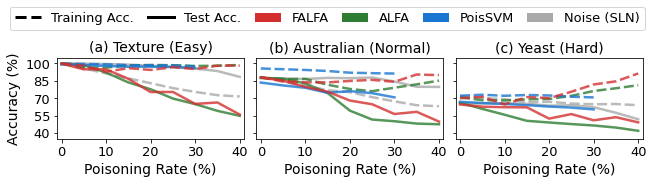

In [32]:
FONTSIZE = 13
FIGSIZE = (9, 2)
LINE_WIDTH = 3
TITLES = [
    '(a) Texture (Easy)',
    '(b) Australian (Normal)',
    '(c) Yeast (Hard)',
]
SELECTED_DATA = [
    'texture_subset_std',
    'australian_std',
    'yeast_subset_std',
]

plt.rcParams["font.size"] = FONTSIZE
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=FIGSIZE)
_axs = []
for i in range(3):
        _axs.append(axs[i])

for dataname, title, ax in zip(SELECTED_DATA, TITLES, _axs):
    dfs = [
        df_rand[df_rand['Data.Base'] == dataname],
        df_alfa[df_alfa['Data.Base'] == dataname],
        df_pois[df_pois['Data.Base'] == dataname],
        df_falfa[df_falfa['Data.Base'] == dataname],
    ]
    draw_subplot(dfs, title, ATTACKS, ax, linewidth=2.5, markers=True)

custom_lines = [
    Line2D([0], [0], color='black', lw=LINE_WIDTH, label='Training Acc.', linestyle='dashed'),
    Line2D([0], [0], color='black', lw=LINE_WIDTH, label='Test Acc.'),
    Patch(facecolor=COLOR_MAP['falfa_nn'], label='FALFA'),
    Patch(facecolor=COLOR_MAP['alfa_svm'], label='ALFA'),
    Patch(facecolor=COLOR_MAP['poison_svm'], label='PoisSVM'),
    Patch(facecolor=COLOR_MAP['rand_svm'], label='Noise (SLN)')
]

# labels_new = []
# for label in labels:
#     labels_new.append(label_dict[label])
fig.legend(handles=custom_lines, loc='lower left', bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=6)
# fig.legend(lines, labels_new, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=6)

plt.tight_layout(pad=0.3)
path_fig_out = os.path.join(path_output, 'flfa_acc.pdf', )
plt.savefig(path_fig_out, dpi=300, bbox_inches='tight')
print(f'Save plot to {path_fig_out}')